In [93]:
# /home/j3nnn1/itba/deepLCourse/20210328_home_BayesDiscreto/13 - TNG - Naive-Bayes.ipynb
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train', shuffle=True)

In [94]:
twenty_train.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [177]:
len(twenty_train.data) #Cantidad de artículos periodísticos

11314

In [96]:
len(twenty_train["target"])

11314

In [97]:
twenty_train["target"] #Clasificaciones de los artículos

array([7, 4, 4, ..., 3, 1, 8])

In [98]:
twenty_train["target_names"] #Referencia de las clasificaciones.

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [99]:
len(twenty_train["target_names"]) #Cantidad de categorías

20

In [100]:
twenty_train.data[0] # Primer artículo

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [194]:
twenty_train.target[0] #Código de clasificación del primer artículo

7

In [193]:
import pprint
pp = pprint.PrettyPrinter(indent=4, compact=True)
pp.pprint(twenty_train.data[0])


("From: lerxst@wam.umd.edu (where's my thing)\n"
 'Subject: WHAT car is this!?\n'
 'Nntp-Posting-Host: rac3.wam.umd.edu\n'
 'Organization: University of Maryland, College Park\n'
 'Lines: 15\n'
 '\n'
 ' I was wondering if anyone out there could enlighten me on this car I saw\n'
 'the other day. It was a 2-door sports car, looked to be from the late 60s/\n'
 'early 70s. It was called a Bricklin. The doors were really small. In '
 'addition,\n'
 'the front bumper was separate from the rest of the body. This is \n'
 'all I know. If anyone can tellme a model name, engine specs, years\n'
 'of production, where this car is made, history, or whatever info you\n'
 'have on this funky looking car, please e-mail.\n'
 '\n'
 'Thanks,\n'
 '- IL\n'
 '   ---- brought to you by your neighborhood Lerxst ----\n'
 '\n'
 '\n'
 '\n'
 '\n')


In [102]:
twenty_train.target_names[7] #Clasificación del primer artículo

'rec.autos'

In [103]:
#En resumen, tenemos un dataset que contiene 11314 artículos periodísticos, clasificados en 20 tipos. Ahora vamos a armar un bag of words y a filtrar un poco el vocabulario.
#Vamos a aplicar el siguiente procesamiento:
#    Tokenization (nltk)
#    Lemmatization (nltk)
#    Stop Words (nltk)
#    Stemming (nltk)
#    Filtrado de palabras
#    Obtención del vocabulario (countvectorizer)
#    Estimación de la probabilidad de ocurrencia de cada palabra para cada categoría
#    Estimación de la probabilidad de cada categoría


import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords


In [104]:
nltk.download('wordnet') # corpus reader ready to use it.
nltk.download('punkt') # algoritmo para separar palabras. to use this function word_tokenize
nltk.download('stopwords') #corpus with a vector of stopwords.
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

[nltk_data] Downloading package wordnet to /home/j3nnn1/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/j3nnn1/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/j3nnn1/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [105]:
# Proceso Un solo articulo bajo los pasos de arriba.
#for art in twenty_train.data:
art=twenty_train.data[0]
tok=word_tokenize(art)
print("\nArtículo tokenizado:")
print(tok)
lem=[lemmatizer.lemmatize(x,pos='v') for x in tok]
print("\nLematización")
print(lem)
stop = [x for x in lem if x not in stopwords.words('english')]
print("\nEliminando stopwords:")
print(stop)
stem=[stemmer.stem(x) for x in stop]
print("\nAplicando stemming")
print(stem)
alpha=[x for x in stem if x.isalpha()]
print("\nFiltrando no-palabras:")
print(alpha)


Artículo tokenizado:
['From', ':', 'lerxst', '@', 'wam.umd.edu', '(', 'where', "'s", 'my', 'thing', ')', 'Subject', ':', 'WHAT', 'car', 'is', 'this', '!', '?', 'Nntp-Posting-Host', ':', 'rac3.wam.umd.edu', 'Organization', ':', 'University', 'of', 'Maryland', ',', 'College', 'Park', 'Lines', ':', '15', 'I', 'was', 'wondering', 'if', 'anyone', 'out', 'there', 'could', 'enlighten', 'me', 'on', 'this', 'car', 'I', 'saw', 'the', 'other', 'day', '.', 'It', 'was', 'a', '2-door', 'sports', 'car', ',', 'looked', 'to', 'be', 'from', 'the', 'late', '60s/', 'early', '70s', '.', 'It', 'was', 'called', 'a', 'Bricklin', '.', 'The', 'doors', 'were', 'really', 'small', '.', 'In', 'addition', ',', 'the', 'front', 'bumper', 'was', 'separate', 'from', 'the', 'rest', 'of', 'the', 'body', '.', 'This', 'is', 'all', 'I', 'know', '.', 'If', 'anyone', 'can', 'tellme', 'a', 'model', 'name', ',', 'engine', 'specs', ',', 'years', 'of', 'production', ',', 'where', 'this', 'car', 'is', 'made', ',', 'history', ',', 

In [106]:

#Procesando todos los artículos:
articulos_filtrados=list()
for idx in range(len(twenty_train.data)):
    if idx%100==0:
        print(idx)
    art=twenty_train.data[idx]
    tok=word_tokenize(art)
    lem=[lemmatizer.lemmatize(x,pos='v') for x in tok]
    stop = [x for x in lem if x not in stopwords.words('english')]
    stem=[stemmer.stem(x) for x in stop]
    alpha=[x for x in stem if x.isalpha()]
    articulos_filtrados.append(" ".join(alpha))

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300


In [107]:

print(articulos_filtrados[6])

from bmdelan brian man delaney subject brain tumor treatment thank bmdelan organ univers chicago line there peopl respond request info treatment astrocytoma email i could thank directli prob sean debra sharon so i think i publicli thank everyon thank i sure glad i accident hit rn instead rm i tri delet file last septemb hmmm


In [108]:

#Salvado del procesamiento a disco:
import pickle

with open('art_filt.txt', 'wb') as fp:
    pickle.dump(articulos_filtrados, fp)

In [109]:

with open ('art_filt.txt', 'rb') as fp:
    itemlist = pickle.load(fp)

In [110]:

print(itemlist[16])

from ab allen b subject re tiff philosoph signific organ purdu univers line in articl prestonm martin preston write whi use pd c librari tiff file it take good minut start use app i certainli use whenev i tiff usual work well that point i philosoph oppos complex thi complex lead program poor tiff writer make bizarr file program inabl load tiff imag though save cours gener inabl interchang imag differ environ despit fact think understand tiff as say go it i worri asshol i big troubl misus abus tiff year i chalk immens unnecessari complex format in word tiff spec appendix g page capit emphasi mine the problem sort success tiff design power flexibl expens simplic it take fair amount effort handl option current defin specif probabl no applic doe a complet job current way sure abl import tiff imag sinc mani applic if program wors applic ca read everi tiff imag mean i might deal whi would i want imag trap format i neither anyon agre anyon cours ab


In [111]:

# Extracting features from articles
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(max_df=0.8,min_df=10)
count_vect.fit(itemlist) #Aprende el vocabulario y le asigna un código a cada palabra

CountVectorizer(max_df=0.8, min_df=10)

In [112]:

count_vect.vocabulary_ #Estos son los índices de cada una de las palabras

{'thing': 8153,
 'what': 8920,
 'car': 1180,
 'univers': 8541,
 'maryland': 4905,
 'colleg': 1523,
 'park': 5896,
 'wonder': 9021,
 'anyon': 358,
 'could': 1774,
 'enlighten': 2630,
 'saw': 7083,
 'day': 1987,
 'it': 4185,
 'sport': 7625,
 'look': 4721,
 'late': 4528,
 'earli': 2470,
 'call': 1130,
 'the': 8116,
 'door': 2359,
 'realli': 6593,
 'small': 7455,
 'in': 3923,
 'addit': 86,
 'front': 3147,
 'bumper': 1064,
 'separ': 7214,
 'rest': 6786,
 'bodi': 895,
 'thi': 8145,
 'know': 4446,
 'if': 3856,
 'model': 5182,
 'name': 5360,
 'engin': 2623,
 'spec': 7579,
 'year': 9131,
 'product': 6339,
 'make': 4841,
 'histori': 3683,
 'whatev': 8921,
 'info': 4001,
 'pleas': 6144,
 'thank': 8112,
 'il': 3870,
 'bring': 1002,
 'neighborhood': 5424,
 'guy': 3467,
 'kuo': 4479,
 'si': 7339,
 'clock': 1462,
 'poll': 6180,
 'final': 2964,
 'summari': 7858,
 'report': 6749,
 'keyword': 4397,
 'acceler': 36,
 'upgrad': 8589,
 'washington': 8856,
 'fair': 2846,
 'number': 5584,
 'brave': 974,
 'sou

In [113]:
vocabulary=count_vect.get_feature_names() #Estos nombres de las palabras seleccionadas para el vocabulario, ordenadas por orden alfabético
print(vocabulary)

['aa', 'aaa', 'aaron', 'ab', 'abandon', 'abbrevi', 'abc', 'aberystwyth', 'abid', 'abil', 'abl', 'abnorm', 'aboard', 'abolish', 'abomin', 'abort', 'abound', 'about', 'abov', 'abpsoft', 'abraham', 'abridg', 'abroad', 'absenc', 'absent', 'absolut', 'absorb', 'abstract', 'absurd', 'abund', 'abus', 'ac', 'academ', 'academi', 'academia', 'acc', 'acceler', 'acceller', 'accept', 'access', 'accessori', 'accid', 'accident', 'accommod', 'accomod', 'accompani', 'accompli', 'accomplish', 'accord', 'accordingli', 'account', 'accumul', 'accur', 'accuraci', 'accus', 'ace', 'ach', 'achiev', 'achkar', 'acid', 'ack', 'acker', 'acknowledg', 'aclu', 'acm', 'acquaint', 'acquir', 'acquisit', 'acronym', 'across', 'act', 'action', 'activ', 'activist', 'actual', 'acut', 'ad', 'adam', 'adapt', 'adaptec', 'adaptor', 'adb', 'adc', 'adcom', 'add', 'addict', 'addit', 'addr', 'address', 'adequ', 'adher', 'adirondack', 'adjac', 'adject', 'adjust', 'adl', 'admin', 'administ', 'administr', 'admir', 'admiss', 'admit', 'a

In [114]:
print(len(vocabulary))

9184


In [115]:

print(vocabulary[641])
print(count_vect.vocabulary_["bank"])

bank
641


In [116]:

count_vect = CountVectorizer(max_df=0.8,min_df=100)
X_train_data=count_vect.fit_transform(articulos_filtrados) #Aprende el vocabulario y le asigna un código a cada palabra

In [117]:

X_train_data.shape #Para cada documento hay un vector de ocurrencias

(11314, 1930)

In [118]:

X_train_data.toarray() #Es una sparse matrix, vamos a expandirla

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [119]:
X_train_data.toarray()[0,:].argmax() #Veamos a qué palabra pertenece la máxima ocurrencia en el primer artíclo

264

In [120]:
print(count_vect.get_feature_names()[264])
#correcto es "car"

car


In [121]:
import pandas as pd

In [122]:
#suavizado de majalanovich
#esto es porque realmente no es una gaussiana y para que se parezca le sumo 1 o una variable alfa a cada
#feature, o todos los features para tener mejores resultados en el accuracy como clasificador
#como generador esto genera mas ruido.

alpha=1.0
columns=count_vect.get_feature_names()
df=pd.DataFrame(X_train_data.toarray(), columns=columns) # Se suma alpha a un artículo para que el log-likelihood no de -inf


In [123]:
df.head()

,abil,abl,about,absolut,abus,academ,acceler,accept,access,accid,...,ye,yeah,year,yesterday,yet,york,you,young,your,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [124]:
df["target_"]=twenty_train.target

In [125]:
df.head()

,abil,abl,about,absolut,abus,academ,acceler,accept,access,accid,...,yeah,year,yesterday,yet,york,you,young,your,zero,target_
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,7
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,14


Cantidad de palabras en el vocabulario:
1930
El vector de ocurrencias para la categoría 0 cuyo largo es 1930 es:
[26. 51.  3. ... 23. 63.  4.]

Log-probabilidad de ocurrencia de cada palabra en el vocabulario, para la categoría:alt.atheism
[3.86576862e-04 7.58285383e-04 4.46050225e-05 ... 3.41971839e-04
 9.36705473e-04 5.94733634e-05]

Log-probabilidad de ocurrencia de la categoría: alt.atheism
0.04242531377054976
El vector de ocurrencias para la categoría 1 cuyo largo es 1930 es:
[ 9. 62.  5. ...  9. 28.  5.]

Log-probabilidad de ocurrencia de cada palabra en el vocabulario, para la categoría:comp.graphics
[1.73577628e-04 1.19575699e-03 9.64320154e-05 ... 1.73577628e-04
 5.40019286e-04 9.64320154e-05]

Log-probabilidad de ocurrencia de la categoría: comp.graphics
0.05161746508750221
El vector de ocurrencias para la categoría 2 cuyo largo es 1930 es:
[13. 41.  8. ...  6. 27.  5.]

Log-probabilidad de ocurrencia de cada palabra en el vocabulario, para la categoría:comp.os.ms-windows.mis

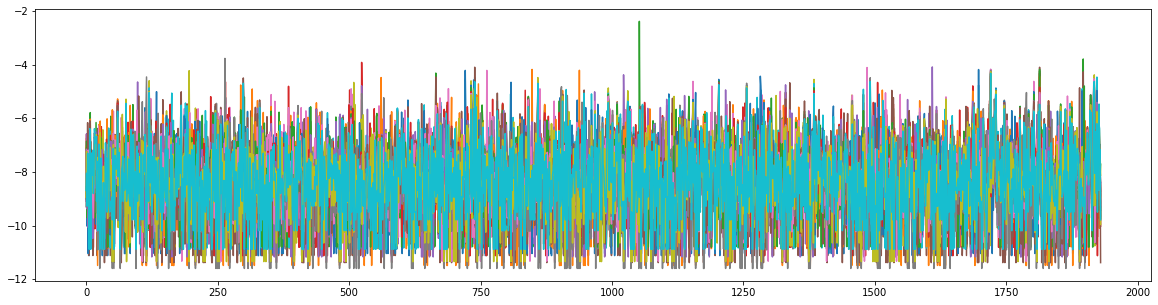

In [126]:
import numpy as np
from matplotlib import pyplot as plt
# Importo el paquete para graficar
from matplotlib import pyplot as plt

# 20 es un numero elegido por la persona o tiene una razon de ser? @TODO
N=20 #Cantidad de categorías a filtrar para calcular las probabilidades condicionales

p_priori=list() #Inicializo una lista para guardar los vectores de probabilidad de cada palabra, para cada categoría
p_model=list() #Inicializo una lista para guardar la probabilidad de ocurrencia de cada categoría

num_arts=df.values.shape[0] #Me quedo con la cantidad de artículos
num_cols=df.values.shape[1]-1 #Me quedo con la cantidad de palabras en el vocabulario
print("Cantidad de palabras en el vocabulario:")
print(num_cols)

plt.figure(figsize=(20, 5)) #Inicializo el gráfico sobre el que voy a dibujar todas las distribuciones
for i in range(20):
    p_aux=sum(df.loc[df['target_'] == i].drop('target_',axis=1).values)+alpha #Sumo las ocurrencias para la categoría i y le sumo a todos los valores alpha, para no tener probabilidad cero
    print("El vector de ocurrencias para la categoría {} cuyo largo es {} es:".format(i,len(p_aux)))
    print(p_aux)
    print("\nLog-probabilidad de ocurrencia de cada palabra en el vocabulario, para la categoría:{}".format(twenty_train["target_names"][i]))
    print(p_aux/sum(p_aux))
    p_priori.append(np.log(p_aux/sum(p_aux)))
    print("\nLog-probabilidad de ocurrencia de la categoría: {}".format(twenty_train["target_names"][i]))
    print(df.loc[df['target_'] == i].shape[0]/num_arts)
    p_model.append(np.log(df.loc[df['target_'] == i].shape[0]/num_arts))
     # Tamaño del gráfico
    plt.plot(p_priori[-1]) # Grafico
    #plt.title(title)
plt.show()

In [127]:
#Agarramos un artículo en particular y calculamos el Likelihood de cada una de las categorías
n_art=56
print("Vamos a calcular los Log-likelihood para cada categoría. Utilizaremos el artículo {}".format(n_art))
print("El artículo pertenece a la categoría {}, la cual es {}".format(twenty_train["target"][n_art], twenty_train["target_names"][twenty_train["target"][n_art] ] ))
maxLogL=-float('inf')
for i in range(20):
    logL=np.dot((X_train_data.toarray()[n_art]),p_priori[i])+p_model[i]
    print("El log-likelihood para la categoría {} del artículo {} es:{}".format(i,n_art,logL))
    if logL>maxLogL:
        maxIdx=i
        maxLogL=logL
print("El Log-likelihood mayor pertenece a la categoría: {}".format(maxIdx))


Vamos a calcular los Log-likelihood para cada categoría. Utilizaremos el artículo 56
El artículo pertenece a la categoría 7, la cual es rec.autos
El log-likelihood para la categoría 0 del artículo 56 es:-1039.3376335511937
El log-likelihood para la categoría 1 del artículo 56 es:-1002.1174187896231
El log-likelihood para la categoría 2 del artículo 56 es:-1004.1325589535041
El log-likelihood para la categoría 3 del artículo 56 es:-988.842220053193
El log-likelihood para la categoría 4 del artículo 56 es:-1001.438669002169
El log-likelihood para la categoría 5 del artículo 56 es:-1032.0703272624012
El log-likelihood para la categoría 6 del artículo 56 es:-1009.779630206355
El log-likelihood para la categoría 7 del artículo 56 es:-927.2881339030977
El log-likelihood para la categoría 8 del artículo 56 es:-983.3259179675831
El log-likelihood para la categoría 9 del artículo 56 es:-1048.306281779206
El log-likelihood para la categoría 10 del artículo 56 es:-1041.4372494648558
El log-likeli

In [179]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train_data.toarray(), twenty_train["target"])
print("La predicción para el artículo {} es:".format(n_art))
print(clf.predict(X_train_data.toarray()[n_art:n_art+1]))

#predictionIndexTrain = clf.predict(X_train_data.toarray()[n_art:n_art+1])
print("* Label:" )
#print(twenty_train["target"])
#print(pd.unique(twenty_train["target"]))
print(twenty_train.target_names[7])

#print(X_train_data)

La predicción para el artículo 56 es:
[7]
* Label:
rec.autos


In [170]:
porc=sum(np.array(clf.predict(X_train_data.toarray()))==np.array(twenty_train["target"]))/11314*100
print("El porcentaje de artículos clasificados correctamente es: {}%".format(porc))

El porcentaje de artículos clasificados correctamente es: 84.63850097224677%


In [131]:
# Ejercicio de multinomialNB

#En el caso anterior, para medir la cantidad de artículos clasiicados correctamente se utilizó el mismo subconjunto del dataset que se utilizó para entrenar.
#Esta medida no es una medida del todo útil, ya que lo que interesa de un clasificador es su capacidad de clasificación de datos que no fueron utilizados para entrenar. Es por eso que se pide, para el clasificador entrenado con el subconjunto de training, cual es el porcentaje de artículos del subconjunto de testing clasificados correctamente. Comparar con el porcentaje anterior y explicar las diferencias.
#Para este ejercicio se puede utilizar el paquete multinomialNB que se encuentra
#dentro de naive-bayes en el paquete sklearn.
#** Importante: para aplicar count vectorizer al dataset de testing sin redefinir el vocabulario, se debe usar el método transform, ya que fit y fit_transform recalculan el vocabulario. **
#Se puede encontrar mas información del dataset en:

#http://scikit-learn.org/stable/datasets/twenty_newsgroups.html#newsgroups
#https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html#sklearn.datasets.fetch_20newsgroups

In [188]:
from sklearn.naive_bayes import MultinomialNB
# clf = MultinomialNB() # esto ya esta definido arriba por lo que no necesita volver
# a ser llamado ya que borra el fit anterior
# (el modelo con el preprocesamiento que habia hecho) que habia hecho.

newsgroups_test = fetch_20newsgroups(subset='test')
print("* Test data tienen newsgroups_test.data elementos o documentos:")
print (len(newsgroups_test.data))
# -- 7532
print("* TEXTO DE EJEMPLO: ")
print(" ")
print(" ")
#print (newsgroups_test.data[0])
# una columna con un texto de 695 caracteres.
print(" ")
print(" ")
# Xtrain data es <class 'scipy.sparse.csr.csr_matrix'>
print("* Necesito llegar a este tipo de data el conjunto de test:")
print(type(X_train_data))
print(" ")
print(" ")
# @TODO falta el preprocesamiento de los datos lo que se hizo arriba stem, lemma.
# @TODO usar cfl.score ( data, clase )
# casi siempre es fit, predict, score.

#tengo que volver el texto en una matrix sparsa (document term matrix) para poder usar predict
count_vect_test = CountVectorizer(vocabulary=count_vect.get_feature_names(), max_df=0.8,min_df=100)
X_test_data = count_vect_test.transform(newsgroups_test.data)

print("* Test data es del mismo tipo que train data?: {}", type(X_test_data)==type(X_train_data))
#esta definido arriba, dejo aca para recordar
#count_vect = CountVectorizer(max_df=0.8,min_df=100)
#X_train_data=count_vect.fit_transform(articulos_filtrados) #Aprende el vocabulario y le asigna un código a cada palabra

* Test data tienen newsgroups_test.data elementos o documentos:
7532
* TEXTO DE EJEMPLO: 
 
 
 
 
* Necesito llegar a este tipo de data el conjunto de test:
<class 'scipy.sparse.csr.csr_matrix'>
 
 
* Test data es del mismo tipo que train data?: {} True


In [189]:
print(len(X_train_data.toarray()))

print(len(X_test_data.toarray()))
#print(X_test_data.)

11314
7532


In [190]:
print(X_test_data.toarray())
print("* La predicción para el artículo {} es:".format(n_art))
print(clf.predict(X_test_data.toarray()[n_art:n_art+1]))
predictionIndexTest = clf.predict(X_test_data.toarray()[n_art:n_art+1])
print("Label:" )
#print(count_vect_test.vocabulary[17])
print(newsgroups_test.target_names[17])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 3 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]
* La predicción para el artículo 56 es:
[17]
Label:
talk.politics.mideast


In [191]:
porc=sum(np.array(clf.predict(X_test_data.toarray()))==np.array(newsgroups_test["target"]))/7532*100
print("El porcentaje de artículos clasificados correctamente es: {}%".format(porc))
# @TODO revisar en tutoria. esta bien que baje tanto el porcentaje de accuraccy

El porcentaje de artículos clasificados correctamente es: 47.65002655337228%


In [196]:
# si revisar preprocesamiento
print(clf.score(X_test_data.toarray(), newsgroups_test["target"]))

0.47650026553372277
